In [25]:
import pandas as pd

data = pd.read_csv("../data/penguins.csv")

In [26]:
data.drop(axis=1, columns=["Unnamed: 0"], inplace=True)
data.head()
data.shape

(344, 8)

In [33]:
categorical_features = data.select_dtypes(include="object").columns.tolist()
numerical_features = data.select_dtypes(include=["float", "int"]).columns.tolist()


all_columns = categorical_features + numerical_features

categorical_features.append("year")
numerical_features.remove("year")

print(categorical_features)
print(numerical_features)

['species', 'island', 'sex', 'year']
['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


In [34]:
for column in categorical_features:
    print(data[column].value_counts())
    print(25 * "=")

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
male      168
female    165
Name: count, dtype: int64
year
2009    120
2008    114
2007    110
Name: count, dtype: int64


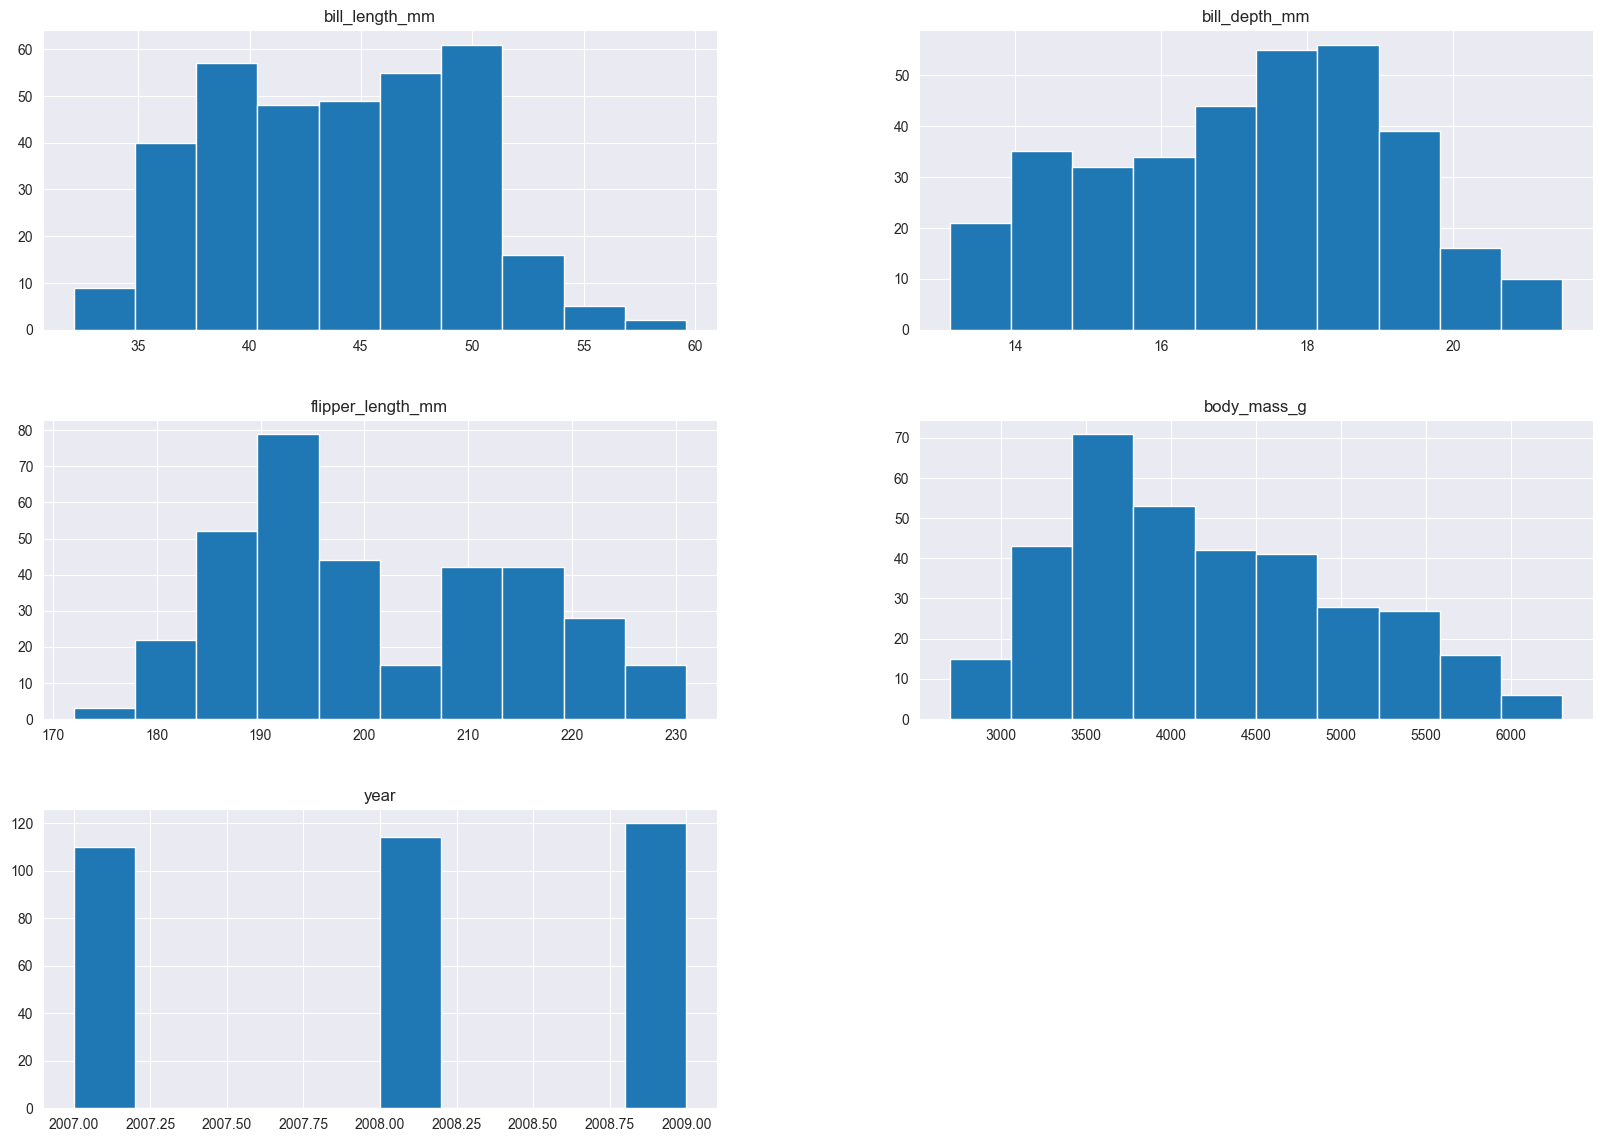

In [35]:
_ = data.hist(figsize=(20, 14))

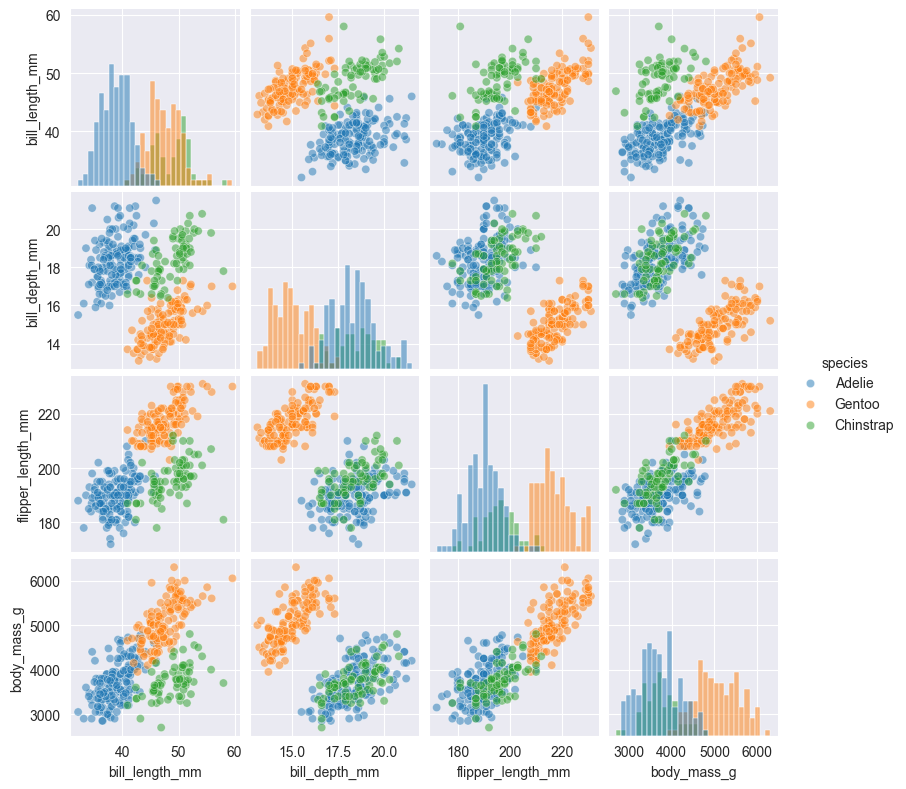

In [36]:
import seaborn as sns

_ = sns.pairplot(
    data,
    vars=numerical_features,
    hue="species",
    plot_kws={"alpha": 0.5},
    height=2,
    diag_kind="hist",
    diag_kws={"bins": 30}
)

### On constate que:
* la variable bill_length_mm combinée à chacune des variables (body_mass_g, flipper_length_mm, et bill_depth_mm) permet d'obtenir une assez bonne classification du specimen de Penguins.
* Compte aux autres variables, elles permettent de subdiviser l'échantillon en deux groupes (l'espèce Gentoo et les deux espèces Adelie/Chinstrap) grâce à une simple droite.